English_Malayalam_Multimodal_Machine_Translation 



In [ ]:

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.image as mp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Training data preprocessing

In [ ]:
with open('/content/drive/My Drive/Main/train.mn.txt') as file:
    train_mal_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/train.en.txt') as file:
    train_eng_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/train_images.txt') as file:
    train_images = file.read().split('\n')


In [ ]:
tr_img_path=[]
for s in train_images:
    tr_img_path.append("/content/drive/My Drive/Main/train/"+s)

In [ ]:
print(len(train_mal_txt))
print(len(train_eng_txt))
print(len(tr_img_path))

28932
28933
28932


In [ ]:
train_mal_txt.pop()
train_eng_txt.pop()
train_eng_txt.pop()
tr_img_path.pop()


'/content/drive/My Drive/Main/train/'

In [ ]:
print(len(train_mal_txt))
print(len(train_eng_txt))
print(len(tr_img_path))

28931
28931
28931


/content/drive/My Drive/Main/train/2417995.jpg
mal:ഒരു ട്രെയിനിന്റെ ഇടത് ടെയിൽ ലൈറ്റ്
eng:a train's left tail light						


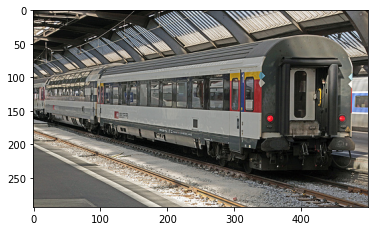

In [ ]:
im=mp.imread(tr_img_path[-1])
plt.imshow(im)
print(tr_img_path[-1])
print("mal:"+train_mal_txt[-1])
print("eng:"+train_eng_txt[-1])

In [ ]:
#Datacleaning by removing special characters
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r" ᠃", "", text)
    text = re.sub(r" ᠂", "", text)
    text = re.sub(r"-", " ", text)
    text = re.sub(r"<5>", "5", text)
    text = re.sub(r"“ ", "", text)
    text = re.sub(r" ”", "", text)
    text = re.sub(r"[+\.\!\/_,$%^*(+\"\']+|[+——！，〈〉《》。︱？?、．％~@#￥%……&*（）’]", "", text)
    text=text.rstrip()
    return text

In [ ]:
trmal_df = pd.DataFrame(train_mal_txt, columns=['Malayalam']) 
treng_df = pd.DataFrame(train_eng_txt, columns=['English']) 

In [ ]:
trmal_text1 = trmal_df["Malayalam"].apply(clean_text)
treng_text1 = treng_df["English"].apply(clean_text)
trmal_text2 = list(trmal_text1.values)
treng_text2 = list(treng_text1.values)

In [ ]:
trmal_temp=[]
for s in trmal_text2:
    trtemp="sos "+s+" eos"
    trmal_temp.append(trtemp)
#text2=[]
trmal_text2=trmal_temp
trmal_text2[1:10]

['sos ഇത് ഒരു ഇൻഡോർ രംഗമാണ് eos',
 'sos കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി eos',
 'sos മനുഷ്യന് ചെറിയ മുടിയുണ്ട് eos',
 'sos ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു eos',
 'sos കറുത്ത കാറിനടുത്ത് ഒരു കൂട്ടം പെൺകുട്ടികളുണ്ട് eos',
 'sos ഒരു ഉന്തുവണ്ടിയിലെ കുട്ടി eos',
 'sos ഉയരമുള്ള മെറ്റൽ ലൈറ്റ്പോസ്റ്റ് eos',
 'sos മതിൽ വെളുത്ത ചായം പൂശി eos',
 'sos ചാരനിറത്തിലുള്ള റോഡിന്റെ വശങ്ങളിൽ പച്ച പുല്ലിന്റെ സ്ട്രിപ്പുകൾ eos']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


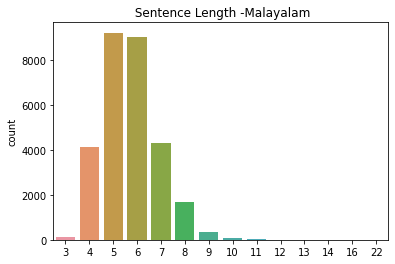

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
trmalayalam_words = []
for i in trmal_text2:
    trmalayalam_words.append(len(i.split()))
sn.countplot(trmalayalam_words).set(title=' Sentence Length -Malayalam')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


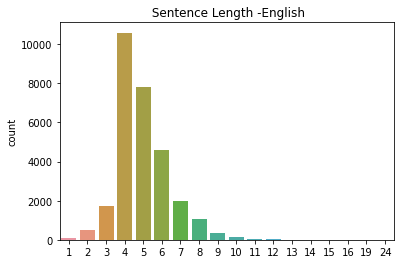

In [ ]:
trenglish_words = []
for j in treng_text2:
    trenglish_words.append(len(j.split()))
sn.countplot(trenglish_words).set(title=' Sentence Length -English')
plt.show()

In [ ]:
trmaxlen_malayalam = max(trmalayalam_words)
trmaxlen_english = max(trenglish_words)
print('Maximum sentence length-Malayalam :',trmaxlen_malayalam)
print('Maximum sentence length-English :',trmaxlen_english)

Maximum sentence length-Malayalam : 22
Maximum sentence length-English : 24


Validation Data Preprocessing

In [ ]:
with open('/content/drive/My Drive/Main/maldev.txt') as file:
    dev_mal_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/endev.txt') as file:
    dev_eng_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/devimage.txt') as file:
    dev_images = file.read().split('\n')

In [ ]:
val_img_path=[]
for s in dev_images:
    val_img_path.append("/content/drive/My Drive/Main/val/"+s)

In [ ]:
print(len(dev_mal_txt))
print(len(dev_eng_txt))
print(len(val_img_path))

999
1000
999


In [ ]:
dev_mal_txt.pop()
dev_eng_txt.pop()
dev_eng_txt.pop()
val_img_path.pop()

'/content/drive/My Drive/Main/val/'

In [ ]:
print(len(dev_mal_txt))
print(len(dev_eng_txt))
print(len(val_img_path))

998
998
998


/content/drive/My Drive/Main/val/2417865.jpg
mal:റാക്കറ്റ് പിടിച്ചിരിക്കുന്ന മനുഷ്യൻ	
eng:racket held by man						


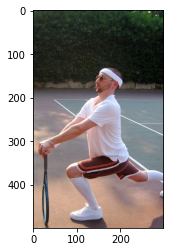

In [ ]:
im=mp.imread(val_img_path[-1])
plt.imshow(im)
print(val_img_path[-1])
print("mal:"+dev_mal_txt[-1])
print("eng:"+dev_eng_txt[-1])

In [ ]:
dmal_df = pd.DataFrame(dev_mal_txt, columns=['Malayalam']) 
deng_df = pd.DataFrame(dev_eng_txt, columns=['English']) 

In [ ]:
dmal_text1 = dmal_df["Malayalam"].apply(clean_text)
deng_text1 = deng_df["English"].apply(clean_text)
dmal_text2 = list(dmal_text1.values)
deng_text2 = list(deng_text1.values)

In [ ]:
dmal_temp=[]
for s in dmal_text2:
    dtemp="sos "+s+" eos"
    dmal_temp.append(dtemp)
#text2=[]
dmal_text2=dmal_temp
dmal_text2[1:10]

['sos ഒരു കെട്ടിടത്തിന്റെ വിൻഡോ eos',
 'sos ഡ്രോയറുകളുള്ള ഇരുണ്ട ചാരനിറത്തിലുള്ള കമ്പ്യൂട്ടർ ഡെസ്ക് eos',
 'sos നിലത്ത് നാല് കാലുകളുള്ള ഉരുക്ക് കസേര eos',
 'sos തെരുവിൽ സൈക്കിൾ ചവിട്ടുന്ന മനുഷ്യൻ eos',
 'sos ഈ കാറുകൾ അഴുക്കിൽ പാർക്ക് ചെയ്തിരിക്കുന്നു eos',
 'sos ആകാശത്ത് വെളുത്ത മേഘങ്ങൾ eos',
 'sos ഗ്ലാസ് വാതിലുകളുടെ ഗണം eos',
 'sos പ്രൊജക്ടർ സ്ക്രീൻ ചുരുട്ടി വെച്ചിരിക്കുന്നു eos',
 'sos ചാരനിറത്തിലുള്ള സ്വെറ്റർ ധരിച്ച മനുഷ്യൻ eos']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


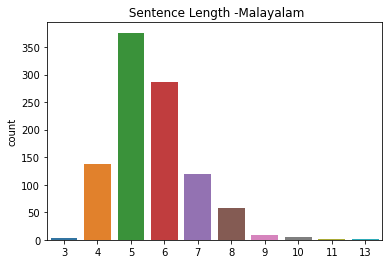

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
dmalayalam_words = []
for i in dmal_text2:
    dmalayalam_words.append(len(i.split()))
sn.countplot(dmalayalam_words).set(title=' Sentence Length -Malayalam')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


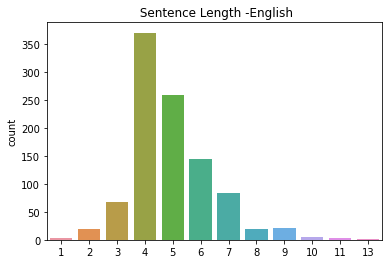

In [ ]:
denglish_words = []
for j in deng_text2:
    denglish_words.append(len(j.split()))
sn.countplot(denglish_words).set(title=' Sentence Length -English')
plt.show()

In [ ]:
dmaxlen_malayalam = max(dmalayalam_words)
dmaxlen_english = max(denglish_words)
print('Maximum sentence length-Malayalam :',dmaxlen_malayalam)
print('Maximum sentence length-English :',dmaxlen_english)

Maximum sentence length-Malayalam : 13
Maximum sentence length-English : 13


Test data preprocessing

In [ ]:
with open('/content/drive/My Drive/Main/maltest.txt') as file:
   test_mal_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/engtest.txt') as file:
   test_eng_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/testimages.txt') as file:
    test_images = file.read().split('\n')

In [ ]:
test_img_path=[]
for s in test_images:
    test_img_path.append("/content/drive/My Drive/Main/test1/"+s)

In [ ]:
print(len(test_mal_txt))
print(len(test_eng_txt))
print(len(test_img_path))


1401
1401
1401


In [ ]:
test_img_path[-1]

'/content/drive/My Drive/Main/test1/'

In [ ]:
test_mal_txt.pop()
test_eng_txt.pop()
test_img_path.pop()

'/content/drive/My Drive/Main/test1/'

In [ ]:
print(len(test_mal_txt))
print(len(test_eng_txt))
print(len(test_img_path))


1400
1400
1400


/content/drive/My Drive/Main/test1/2417918.jpg
mal:റോഡിൽ ഇംഗ്ലീഷ് സിറ്റി ബസ്
eng:English city bus on the road	


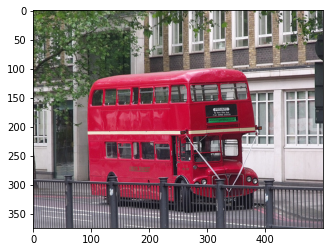

In [ ]:
im=mp.imread(test_img_path[-1])
plt.imshow(im)
print(test_img_path[-1])
print("mal:"+test_mal_txt[-1])
print("eng:"+test_eng_txt[-1])

In [ ]:
ttmal_df = pd.DataFrame(test_mal_txt, columns=['Malayalam']) 
tteng_df = pd.DataFrame(test_eng_txt, columns=['English']) 

In [ ]:
ttmal_text1 = ttmal_df["Malayalam"].apply(clean_text)
tteng_text1 = tteng_df["English"].apply(clean_text)
ttmal_text2 = list(ttmal_text1.values)
tteng_text2 = list(tteng_text1.values)

In [ ]:
ttmal_temp=[]
for s in ttmal_text2:
    tttemp="sos "+s+" eos"
    ttmal_temp.append(tttemp)
#text2=[]
ttmal_text2=ttmal_temp
ttmal_text2[1:10]

['sos കത്തികൊണ്ട് കൗണ്ടറിൽ ഇരിക്കുന്ന കത്തി ബ്ലോക്ക് eos',
 'sos ചട്ടിയിൽ രണ്ടാമത്തെ പിസ്സ eos',
 'sos ബീജ് സ്റ്റെയർ വേ രണ്ടാം ലെവലിലേക്ക് പോകുന്നു eos',
 'sos ടാൻ ഹൗസിലെ ഇളം നിറമുള്ള രണ്ടാം നില eos',
 'sos കെട്ടിടങ്ങളുടെ രണ്ടാമത്തെ നിലയിലെ ബാൽക്കണി eos',
 'sos രാത്രി സ്റ്റാന്റിലെ വിളക്ക് കട്ടിലിന്റെ ഇടതുവശത്ത് നിൽക്കുന്നു eos',
 'sos നൈറ്റ് സ്റ്റാൻഡിന് മുകളിൽ ഒരു വെളുത്ത അലാറം ക്ലോക്ക് ഉണ്ട് eos',
 'sos ഒരു കറുത്ത സംഗീത സ്റ്റാൻഡ് eos',
 'sos തെരുവ് മുറിച്ചുകടക്കാൻ കാത്തിരിക്കുന്ന സ്ത്രീ eos']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


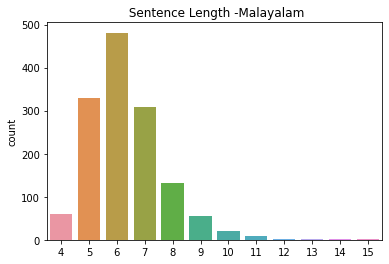

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
ttmalayalam_words = []
for i in ttmal_text2:
    ttmalayalam_words.append(len(i.split()))
sn.countplot(ttmalayalam_words).set(title=' Sentence Length -Malayalam')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


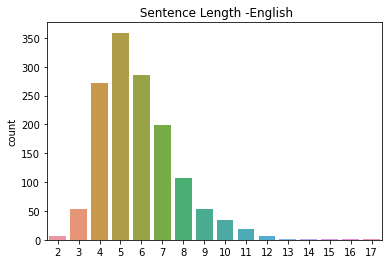

In [ ]:
ttenglish_words = []
for j in tteng_text2:
    ttenglish_words.append(len(j.split()))
sn.countplot(ttenglish_words).set(title=' Sentence Length -English')
plt.show()

In [ ]:
ttmaxlen_malayalam = max(ttmalayalam_words)
ttmaxlen_english = max(ttenglish_words)
print('Maximum sentence length-Malayalam :',ttmaxlen_malayalam)
print('Maximum sentence length-English :',ttmaxlen_english)

Maximum sentence length-Malayalam : 15
Maximum sentence length-English : 17


In [ ]:
x_tt=tteng_text2
y_tt=ttmal_text2

Tokenizing

In [ ]:
x_tr=treng_text2
y_tr=trmal_text2
x_val=deng_text2
y_val=dmal_text2


In [ ]:
#Tokening the sentences using Keras tokenizer -Malayalam data
from keras.preprocessing.text import Tokenizer
x_tokens = Tokenizer()
x_tokens.fit_on_texts(x_tr)
x_tr = x_tokens.texts_to_sequences(x_tr)
x_val = x_tokens.texts_to_sequences(x_val)
print('x_tr:',x_tr)
print('x_val:',x_val)

x_tr: [[432, 237, 187, 6, 1418, 6, 2, 173], [145, 5, 29, 2227, 252], [146, 1864, 506, 3], [8, 51, 244, 79], [166, 2228, 168, 3, 29, 2987, 688], [238, 5, 1, 135, 4, 419, 449, 2, 10, 59], [157, 6, 1, 977], [118, 109, 2988], [25, 5, 311, 7], [238, 27, 336, 807, 3, 2, 25], [15, 496, 2, 173], [14, 5, 29, 751, 2989], [212, 1035, 440], [2990, 5, 3, 1, 30], [1, 7, 352, 344], [7, 689, 345, 263, 715], [18, 441, 33, 11, 83], [8, 6, 96, 230, 346, 3, 28], [50, 3, 2, 28], [1, 8, 32, 6, 614, 411], [450, 121, 3, 25], [319, 4, 2, 133], [50, 4, 1, 94], [2, 442, 5, 170], [1, 8, 582, 1, 364], [1, 18, 885, 6, 26], [208, 11, 843, 469], [258, 3, 2, 44], [1, 546, 7, 44], [10, 214, 516], [1, 18, 1280, 583, 6, 2, 291, 4, 2, 59], [16, 59, 91, 476, 1, 33], [59, 3, 2, 33], [1419, 1420, 20, 2991], [1, 10, 59, 11, 1, 21, 162], [133, 52, 2, 30], [1, 2229, 53, 3, 1, 242], [85, 337, 4, 1, 28], [50, 3, 1, 28], [17, 30, 32, 3, 60, 4, 1, 108], [108, 208, 5, 3], [1, 21, 41], [425, 4, 2, 76], [663, 69, 181, 2, 28], [844, 10

In [ ]:
x_tokens.index_word[1]

'a'

In [ ]:
#padding with post (appending zeros at the end to equalize sentence length)
from keras.preprocessing.sequence import pad_sequences
x_tr = pad_sequences(x_tr,maxlen = trmaxlen_english,padding = 'post')
x_val = pad_sequences(x_val,maxlen = trmaxlen_english,padding = 'post')

# +1 for padding 
x_voc_size   =  len(x_tokens.word_index) +1
print("No of unique words in English",x_voc_size)

No of unique words in English 5570


In [ ]:
#Tokening the sentences using Keras tokenizer -Malayalam data
from keras.preprocessing.text import Tokenizer
y_tokens = Tokenizer()
y_tokens.fit_on_texts(y_tr)
y_tr = y_tokens.texts_to_sequences(y_tr)
y_val = y_tokens.texts_to_sequences(y_val)
print('x_tr:',y_tr)
print('x_val:',y_val)

x_tr: [[1, 974, 1376, 4856, 1158, 672, 287, 2], [1, 62, 3, 3335, 3336, 2], [1, 147, 2631, 1377, 2], [1, 311, 25, 263, 2], [1, 288, 4857, 4858, 1032, 4859, 2], [1, 4, 4860, 3, 73, 4861, 2], [1, 3, 4862, 79, 2], [1, 119, 160, 4863, 2], [1, 131, 5, 443, 1159, 2], [1, 12, 18, 21, 7, 19, 22, 2], [1, 975, 1378, 6, 2], [1, 27, 1095, 4864, 2], [1, 206, 462, 801, 2], [1, 4865, 3, 4866, 2], [1, 3, 5, 384, 853, 2], [1, 3337, 80, 1096, 1506, 2], [1, 1097, 95, 906, 29, 2], [1, 12, 3338, 8, 432, 1507, 2], [1, 3, 38, 11, 31, 2], [1, 4867, 57, 28, 2], [1, 4868, 134, 224, 2], [1, 976, 360, 2], [1, 3, 38, 11, 31, 2], [1, 802, 71, 2], [1, 3, 4, 26, 14, 2], [1, 3, 29, 69, 1914, 2], [1, 269, 1690, 166, 2], [1, 977, 139, 2], [1, 3, 729, 80, 149, 2], [1, 4, 270, 730, 2], [1, 3, 29, 457, 4869, 1160, 1379, 2], [1, 7, 76, 385, 88, 272, 2], [1, 90, 76, 2], [1, 4870, 2632, 109, 2], [1, 24, 3339, 3, 4, 76, 2], [1, 236, 49, 2], [1, 3, 514, 3, 3340, 37, 2], [1, 3, 111, 70, 1033, 2], [1, 3, 38, 11, 31, 2], [1, 1915, 

In [ ]:
#padding with post (appending zeros at the end to equalize sentence length)
from keras.preprocessing.sequence import pad_sequences
y_tr = pad_sequences(y_tr,maxlen = trmaxlen_malayalam,padding = 'post')
y_val = pad_sequences(y_val,maxlen = trmaxlen_malayalam,padding = 'post')

# +1 for padding 
y_voc_size   =  len(y_tokens.word_index) +1
print("No of unique words in English",y_voc_size)

No of unique words in English 11314


In [ ]:
#Tokening the sentences using Keras tokenizer -Malayalam data
#from keras.preprocessing.text import Tokenizer
#x_tokens = Tokenizer()
x_tokens.fit_on_texts(x_tt)
x_tt = x_tokens.texts_to_sequences(x_tt)
print('x_tt:',x_tt)

x_tt: [[103, 170, 5598, 25], [325, 170, 36, 3, 256, 11, 974, 6, 142], [1, 178, 75, 6, 1, 450], [625, 1180, 534, 376, 38, 178, 980], [209, 279, 11, 2616, 151, 178, 104], [2316, 3, 2, 178, 816, 4, 2, 514], [201, 3, 2, 457, 95, 38, 2, 161, 4, 2, 102], [1, 7, 1506, 39, 5, 3, 56, 4, 2, 457, 95], [1, 10, 2301, 95], [2, 15, 5, 448, 38, 141, 2, 33], [303, 27, 58, 120], [292, 3, 2, 77], [29, 1506, 39, 3, 2, 457, 95], [2, 226, 5599, 6, 21], [1, 18, 95, 145, 38, 1, 25], [8, 699, 50, 96, 77, 32], [226, 288, 4, 266], [1695, 1033, 38, 2, 178, 104], [1, 238, 3, 1, 95], [146, 217, 583, 482], [31, 3, 2, 178, 980], [2, 77, 5, 249, 4, 240], [29, 378, 1132, 207, 1, 1132, 1120], [341, 1261, 2115, 141, 152, 2, 33], [1206, 95, 3, 2, 48], [95, 6, 2, 154], [1, 99, 5, 94, 6, 72, 4, 2, 65, 170], [141, 3, 56, 4, 643], [178, 61, 94, 3, 2, 33], [5600, 5, 498, 6, 566, 9, 5601, 285], [1, 12, 226, 288], [503, 3, 178, 104, 4, 30], [10, 801, 39, 3, 457, 95], [1, 178, 5602, 6, 154], [188, 3, 457, 95], [561, 4, 781, 3, 10

In [ ]:
from keras.preprocessing.sequence import pad_sequences
x_tt = pad_sequences(x_tt,maxlen = trmaxlen_english,padding = 'post')

In [ ]:

#y_tokens = Tokenizer()
y_tokens.fit_on_texts(y_tt)
y_tt = y_tokens.texts_to_sequences(y_tt)

In [ ]:
y_tt = pad_sequences(y_tt,maxlen = trmaxlen_english,padding = 'post')

In [ ]:
pip install keras-applications

     |████████████████████████████████| 50 kB 3.1 MB/s 


In [ ]:
import pandas as pd
import pickle
import numpy as np
import os
import keras
import tensorflow
from keras_applications.resnet import ResNet50
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, GlobalAveragePooling2D,BatchNormalization,Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model
from keras.utils import np_utils
import random
from keras.preprocessing import image, sequence
import matplotlib.pyplot as plt
import keras
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings


Train image Encodings from Efficient Net B7



---



In [ ]:
t1_feature=np.load('/content/drive/My Drive/Main/effienet1.npy', encoding='bytes')

In [ ]:
t2_feature=np.load('/content/drive/My Drive/Main/effienet2.npy', encoding='bytes')

In [ ]:
trvgg_feature=np.concatenate((t1_feature,t2_feature,), axis=0)

In [ ]:
x_voc=x_voc_size
y_voc=y_voc_size

In [ ]:
len(trvgg_feature)

28931

Validation image features


In [ ]:
dvgg_feature=np.load('/content/drive/My Drive/Main/deveffienet2.npy', encoding='bytes')

Test image features



In [ ]:
testvgg_feature=np.load('/content/drive/My Drive/Main/testeffienet2.npy', encoding='bytes')

In [ ]:
#Generating a repeat vector from image pixels
img_inputs=Input(shape=(2560,))
d_1=Dense(512, activation='relu')(img_inputs)
r_1=RepeatVector(trmaxlen_english)(d_1)
vf_model = Model(img_inputs, r_1)
vf_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2560)]            0         
                                                                 
 dense_1 (Dense)             (None, 512)               1311232   
                                                                 
 repeat_vector (RepeatVector  (None, 24, 512)          0         
 )                                                               
                                                                 
Total params: 1,311,232
Trainable params: 1,311,232
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Model
x_voc=x_voc_size
y_voc=y_voc_size
latent_dim = 512
embedding_dim=512
#Encoder
encoder_inputs = Input(shape=(trmaxlen_english,))
#The model will take as input an integer matrix of size (batch,input_length)and the largest integer (i.e. word index) in the input
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)
print(encoder_inputs.get_shape)
print(enc_emb.get_shape)

<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, 24) dtype=float32 (created by layer 'input_4')>>
<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, 24, 512) dtype=float32 (created by layer 'embedding_1')>>


In [ ]:
#encoder LSTM Layer 1#merge_mode='sum'
encoder_lstm1 = Bidirectional(LSTM(256,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4))
#The dimension of each state equals to the LSTM unit number
encoder_output1= encoder_lstm1(enc_emb)
print(encoder_lstm1.output_shape)



[(None, 24, 512), (None, 256), (None, 256), (None, 256), (None, 256)]


In [ ]:
#LSTM layer 2
encoder_lstm2 = Bidirectional(LSTM(256,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4))
encoder_output2 = encoder_lstm2(encoder_output1)
print(encoder_lstm2.output_shape)

[(None, 24, 512), (None, 256), (None, 256), (None, 256), (None, 256)]


In [ ]:
encoder_output2

[<KerasTensor: shape=(None, 24, 512) dtype=float32 (created by layer 'bidirectional_3')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'bidirectional_3')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'bidirectional_3')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'bidirectional_3')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'bidirectional_3')>]

In [ ]:
encoder_output=encoder_output2[0]
encoder_output

<KerasTensor: shape=(None, 24, 512) dtype=float32 (created by layer 'bidirectional_3')>

In [ ]:
encoder_output=Concatenate(axis=-1)([encoder_output,r_1])
encoder_output

<KerasTensor: shape=(None, 24, 1024) dtype=float32 (created by layer 'concatenate_1')>

In [ ]:
encoder_output2[0]=encoder_output

In [ ]:
#layer 3
encoder_lstm3= Bidirectional(LSTM(256, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4), name="encoder_lstm_3")
encoder_outputs, forward_h, forward_c, backward_h, backward_c= encoder_lstm3(encoder_output2)
encoder_states = [forward_h, forward_c, backward_h, backward_c]

In [ ]:
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])

In [ ]:
encoder_states =[state_h, state_c]

In [ ]:
#Decoder
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
#embedding layer
dec_emb_layer = Embedding(y_voc, 1024,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
print(decoder_inputs.get_shape)
print(dec_emb.get_shape)

<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, None) dtype=float32 (created by layer 'input_5')>>
<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, None, 1024) dtype=float32 (created by layer 'embedding_2')>>


In [ ]:
#Decoder LSTM layer1
decoder_lstm = LSTM(512, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=encoder_states)
print(decoder_lstm.output_shape)

[(None, None, 512), (None, 512), (None, 512)]


In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import keras
from keras import backend as K
from keras import activations, initializers, regularizers, constraints, metrics
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import (Dense, Dropout, Activation, Flatten, Reshape, Layer,
                          BatchNormalization, LocallyConnected2D,
                          ZeroPadding2D, Conv2D, MaxPooling2D, Conv2DTranspose,
                          GaussianNoise, UpSampling2D, Input)
#from keras.utils import conv_utils, multi_gpu_model
from keras.layers import Lambda
#from keras.engine import Layer, InputSpec
#from keras.legacy import interfaces

In [ ]:

class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_out_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>', U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)
            if verbose:
                print('Ws+Uh>', Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [ ]:
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

In [ ]:
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

In [ ]:
#dense = Dense(fr_vsize, activation='softmax', name='softmax_layer')
#dense_time = TimeDistributed(dense, name='time_distributed_layer')
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)
#decoder_output = dense_time(decoder_concat_input)
print(decoder_dense.output_shape)

(None, None, 11314)


In [ ]:
model = Model([encoder_inputs,decoder_inputs,img_inputs], decoder_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 24)]         0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 24, 512)      2851840     ['input_4[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 2560)]       0           []                               
                                                                                                  
 bidirectional_2 (Bidirectional  [(None, 24, 512),   1574912     ['embedding_1[0][0]']            
 )                               (None, 256),                                               

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("/content/drive/My Drive/Main/efficeinetmmt", monitor='val_accuracy')

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
print(len(x_tr))
print(len(y_tr))

28931
28931


In [ ]:
print(len(x_val))
print(len(y_val))
print(len(dvgg_feature))

998
998
998


In [ ]:
print(len(x_tr))
print(len(y_tr))
print(len(trvgg_feature))

28931
28931
28931


In [ ]:
dvgg_feature=dvgg_feature[:-1]

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit([x_tr,y_tr[:,:-1],trvgg_feature], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,validation_data=([x_val,y_val[:,:-1],dvgg_feature], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]),epochs=100,batch_size=512,callbacks= callbacks_list)

Epoch 1/100
57/57 [==============================] - ETA: 0s - loss: 1.2570 - accuracy: 0.8374INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 269s 4s/step - loss: 1.2570 - accuracy: 0.8374 - val_loss: 1.1069 - val_accuracy: 0.8522
Epoch 2/100
57/57 [==============================] - ETA: 0s - loss: 1.1137 - accuracy: 0.8504INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 252s 4s/step - loss: 1.1137 - accuracy: 0.8504 - val_loss: 1.0486 - val_accuracy: 0.8543
Epoch 3/100
57/57 [==============================] - ETA: 0s - loss: 1.0162 - accuracy: 0.8594INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 250s 4s/step - loss: 1.0162 - accuracy: 0.8594 - val_loss: 0.9945 - val_accuracy: 0.8590
Epoch 4/100
57/57 [==============================] - ETA: 0s - loss: 0.9338 - accuracy: 0.8642INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 251s 4s/step - loss: 0.9338 - accuracy: 0.8642 - val_loss: 0.9284 - val_accuracy: 0.8651
Epoch 5/100
57/57 [==============================] - ETA: 0s - loss: 0.8518 - accuracy: 0.8691INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 253s 4s/step - loss: 0.8518 - accuracy: 0.8691 - val_loss: 0.8712 - val_accuracy: 0.8699
Epoch 6/100
57/57 [==============================] - ETA: 0s - loss: 0.7733 - accuracy: 0.8747INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 256s 5s/step - loss: 0.7733 - accuracy: 0.8747 - val_loss: 0.8356 - val_accuracy: 0.8740
Epoch 7/100
57/57 [==============================] - ETA: 0s - loss: 0.7018 - accuracy: 0.8795INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 265s 5s/step - loss: 0.7018 - accuracy: 0.8795 - val_loss: 0.8063 - val_accuracy: 0.8782
Epoch 8/100
57/57 [==============================] - ETA: 0s - loss: 0.6372 - accuracy: 0.8841INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 262s 5s/step - loss: 0.6372 - accuracy: 0.8841 - val_loss: 0.7895 - val_accuracy: 0.8803
Epoch 9/100
57/57 [==============================] - ETA: 0s - loss: 0.5759 - accuracy: 0.8904INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 259s 5s/step - loss: 0.5759 - accuracy: 0.8904 - val_loss: 0.7776 - val_accuracy: 0.8817
Epoch 10/100
57/57 [==============================] - ETA: 0s - loss: 0.5186 - accuracy: 0.8986INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 263s 5s/step - loss: 0.5186 - accuracy: 0.8986 - val_loss: 0.7720 - val_accuracy: 0.8834
Epoch 11/100
57/57 [==============================] - ETA: 0s - loss: 0.4632 - accuracy: 0.9072INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 261s 5s/step - loss: 0.4632 - accuracy: 0.9072 - val_loss: 0.7594 - val_accuracy: 0.8851
Epoch 12/100
57/57 [==============================] - ETA: 0s - loss: 0.4097 - accuracy: 0.9163INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 263s 5s/step - loss: 0.4097 - accuracy: 0.9163 - val_loss: 0.7468 - val_accuracy: 0.8875
Epoch 13/100
57/57 [==============================] - ETA: 0s - loss: 0.3610 - accuracy: 0.9253INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 261s 5s/step - loss: 0.3610 - accuracy: 0.9253 - val_loss: 0.7423 - val_accuracy: 0.8878
Epoch 14/100
57/57 [==============================] - ETA: 0s - loss: 0.3167 - accuracy: 0.9337INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 263s 5s/step - loss: 0.3167 - accuracy: 0.9337 - val_loss: 0.7280 - val_accuracy: 0.8909
Epoch 15/100
57/57 [==============================] - ETA: 0s - loss: 0.2771 - accuracy: 0.9420INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 264s 5s/step - loss: 0.2771 - accuracy: 0.9420 - val_loss: 0.7256 - val_accuracy: 0.8914
Epoch 16/100
57/57 [==============================] - ETA: 0s - loss: 0.2417 - accuracy: 0.9494INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 260s 5s/step - loss: 0.2417 - accuracy: 0.9494 - val_loss: 0.7185 - val_accuracy: 0.8937
Epoch 17/100
57/57 [==============================] - ETA: 0s - loss: 0.2094 - accuracy: 0.9564INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 260s 5s/step - loss: 0.2094 - accuracy: 0.9564 - val_loss: 0.7159 - val_accuracy: 0.8939
Epoch 18/100
57/57 [==============================] - ETA: 0s - loss: 0.1808 - accuracy: 0.9630INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 261s 5s/step - loss: 0.1808 - accuracy: 0.9630 - val_loss: 0.7116 - val_accuracy: 0.8945
Epoch 19/100
57/57 [==============================] - ETA: 0s - loss: 0.1557 - accuracy: 0.9687INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 262s 5s/step - loss: 0.1557 - accuracy: 0.9687 - val_loss: 0.7125 - val_accuracy: 0.8950
Epoch 20/100
57/57 [==============================] - ETA: 0s - loss: 0.1345 - accuracy: 0.9736INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 262s 5s/step - loss: 0.1345 - accuracy: 0.9736 - val_loss: 0.7057 - val_accuracy: 0.8968
Epoch 21/100
57/57 [==============================] - ETA: 0s - loss: 0.1155 - accuracy: 0.9783INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 259s 5s/step - loss: 0.1155 - accuracy: 0.9783 - val_loss: 0.7049 - val_accuracy: 0.8965
Epoch 22/100
57/57 [==============================] - ETA: 0s - loss: 0.0989 - accuracy: 0.9821INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 265s 5s/step - loss: 0.0989 - accuracy: 0.9821 - val_loss: 0.7050 - val_accuracy: 0.8973
Epoch 23/100
57/57 [==============================] - ETA: 0s - loss: 0.0853 - accuracy: 0.9854INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 264s 5s/step - loss: 0.0853 - accuracy: 0.9854 - val_loss: 0.7085 - val_accuracy: 0.8978
Epoch 24/100
57/57 [==============================] - ETA: 0s - loss: 0.0726 - accuracy: 0.9884INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 260s 5s/step - loss: 0.0726 - accuracy: 0.9884 - val_loss: 0.7056 - val_accuracy: 0.8987
Epoch 25/100
57/57 [==============================] - ETA: 0s - loss: 0.0624 - accuracy: 0.9907INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 264s 5s/step - loss: 0.0624 - accuracy: 0.9907 - val_loss: 0.7146 - val_accuracy: 0.8979
Epoch 26/100
57/57 [==============================] - ETA: 0s - loss: 0.0543 - accuracy: 0.9925INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 263s 5s/step - loss: 0.0543 - accuracy: 0.9925 - val_loss: 0.7127 - val_accuracy: 0.8990
Epoch 27/100
57/57 [==============================] - ETA: 0s - loss: 0.0466 - accuracy: 0.9942INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 258s 5s/step - loss: 0.0466 - accuracy: 0.9942 - val_loss: 0.7151 - val_accuracy: 0.8995
Epoch 28/100
57/57 [==============================] - ETA: 0s - loss: 0.0407 - accuracy: 0.9954INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 263s 5s/step - loss: 0.0407 - accuracy: 0.9954 - val_loss: 0.7147 - val_accuracy: 0.9000
Epoch 29/100
57/57 [==============================] - ETA: 0s - loss: 0.0350 - accuracy: 0.9965INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 262s 5s/step - loss: 0.0350 - accuracy: 0.9965 - val_loss: 0.7195 - val_accuracy: 0.9000
Epoch 30/100
57/57 [==============================] - ETA: 0s - loss: 0.0307 - accuracy: 0.9972INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 264s 5s/step - loss: 0.0307 - accuracy: 0.9972 - val_loss: 0.7206 - val_accuracy: 0.8995
Epoch 31/100
57/57 [==============================] - ETA: 0s - loss: 0.0270 - accuracy: 0.9978INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 262s 5s/step - loss: 0.0270 - accuracy: 0.9978 - val_loss: 0.7251 - val_accuracy: 0.8998
Epoch 32/100
57/57 [==============================] - ETA: 0s - loss: 0.0240 - accuracy: 0.9984INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 262s 5s/step - loss: 0.0240 - accuracy: 0.9984 - val_loss: 0.7243 - val_accuracy: 0.9015
Epoch 33/100
57/57 [==============================] - ETA: 0s - loss: 0.0213 - accuracy: 0.9987INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 260s 5s/step - loss: 0.0213 - accuracy: 0.9987 - val_loss: 0.7262 - val_accuracy: 0.9006
Epoch 34/100
57/57 [==============================] - ETA: 0s - loss: 0.0191 - accuracy: 0.9990INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 263s 5s/step - loss: 0.0191 - accuracy: 0.9990 - val_loss: 0.7304 - val_accuracy: 0.9001
Epoch 35/100
57/57 [==============================] - ETA: 0s - loss: 0.0177 - accuracy: 0.9990INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 260s 5s/step - loss: 0.0177 - accuracy: 0.9990 - val_loss: 0.7310 - val_accuracy: 0.9018
Epoch 36/100
57/57 [==============================] - ETA: 0s - loss: 0.0158 - accuracy: 0.9993INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 255s 4s/step - loss: 0.0158 - accuracy: 0.9993 - val_loss: 0.7335 - val_accuracy: 0.9016
Epoch 37/100
57/57 [==============================] - ETA: 0s - loss: 0.0142 - accuracy: 0.9995INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 263s 5s/step - loss: 0.0142 - accuracy: 0.9995 - val_loss: 0.7365 - val_accuracy: 0.9028
Epoch 38/100
57/57 [==============================] - ETA: 0s - loss: 0.0128 - accuracy: 0.9996INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 261s 5s/step - loss: 0.0128 - accuracy: 0.9996 - val_loss: 0.7422 - val_accuracy: 0.9017
Epoch 39/100
57/57 [==============================] - ETA: 0s - loss: 0.0120 - accuracy: 0.9996INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 265s 5s/step - loss: 0.0120 - accuracy: 0.9996 - val_loss: 0.7419 - val_accuracy: 0.9017
Epoch 40/100
57/57 [==============================] - ETA: 0s - loss: 0.0110 - accuracy: 0.9997INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 261s 5s/step - loss: 0.0110 - accuracy: 0.9997 - val_loss: 0.7463 - val_accuracy: 0.9006
Epoch 41/100
57/57 [==============================] - ETA: 0s - loss: 0.0105 - accuracy: 0.9997INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 262s 5s/step - loss: 0.0105 - accuracy: 0.9997 - val_loss: 0.7410 - val_accuracy: 0.9015
Epoch 42/100
57/57 [==============================] - ETA: 0s - loss: 0.0098 - accuracy: 0.9997INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmmt/assets


57/57 [==============================] - 263s 5s/step - loss: 0.0098 - accuracy: 0.9997 - val_loss: 0.7466 - val_accuracy: 0.9020


In [ ]:
from keras.utils.vis_utils import plot_model
import tensorflow as tf

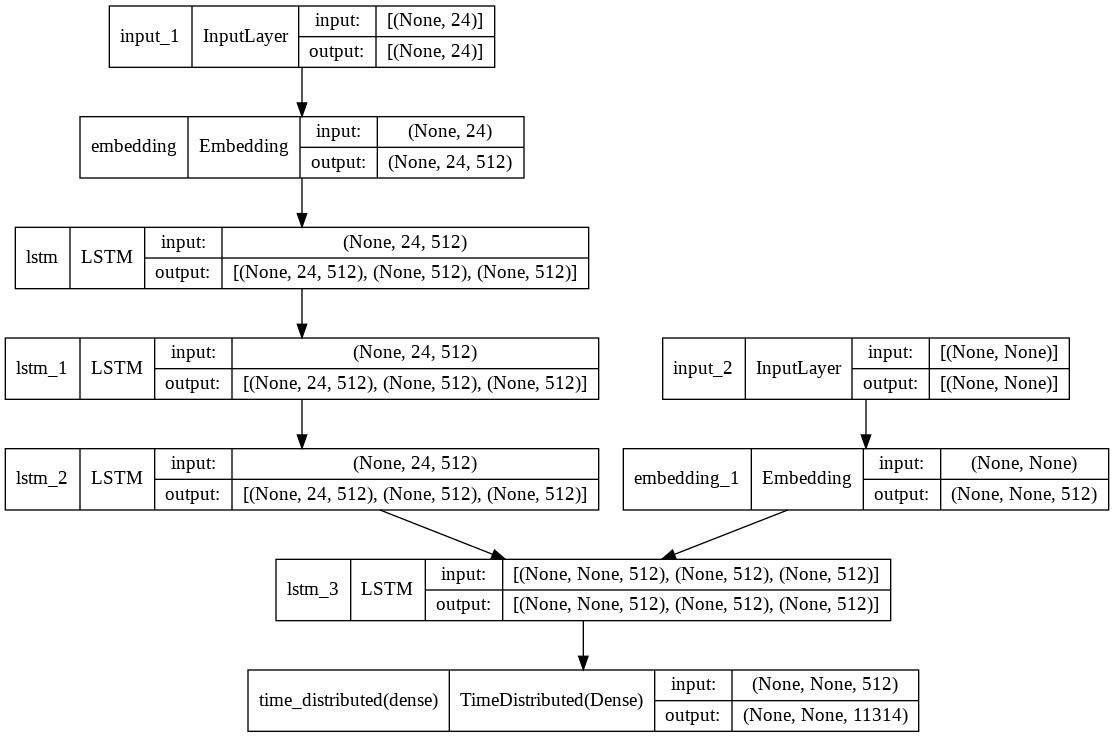

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("/content/drive/My Drive/Main/modelnmt", monitor='val_accuracy')

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]),epochs=100,batch_size=512,callbacks=callbacks_list)

Epoch 1/100
57/57 [==============================] - ETA: 0s - loss: 2.4576 - accuracy: 0.7646INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 64s 905ms/step - loss: 2.4576 - accuracy: 0.7646 - val_loss: 1.3229 - val_accuracy: 0.8226
Epoch 2/100
57/57 [==============================] - ETA: 0s - loss: 1.3613 - accuracy: 0.8231INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 51s 895ms/step - loss: 1.3613 - accuracy: 0.8231 - val_loss: 1.1891 - val_accuracy: 0.8501
Epoch 3/100
57/57 [==============================] - ETA: 0s - loss: 1.2681 - accuracy: 0.8374INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 879ms/step - loss: 1.2681 - accuracy: 0.8374 - val_loss: 1.1498 - val_accuracy: 0.8512
Epoch 4/100
57/57 [==============================] - ETA: 0s - loss: 1.2114 - accuracy: 0.8410INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 51s 893ms/step - loss: 1.2114 - accuracy: 0.8410 - val_loss: 1.1235 - val_accuracy: 0.8519
Epoch 5/100
57/57 [==============================] - ETA: 0s - loss: 1.1545 - accuracy: 0.8486INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 876ms/step - loss: 1.1545 - accuracy: 0.8486 - val_loss: 1.0964 - val_accuracy: 0.8537
Epoch 6/100
57/57 [==============================] - ETA: 0s - loss: 1.1083 - accuracy: 0.8531INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 883ms/step - loss: 1.1083 - accuracy: 0.8531 - val_loss: 1.0773 - val_accuracy: 0.8540
Epoch 7/100
57/57 [==============================] - ETA: 0s - loss: 1.0721 - accuracy: 0.8563INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 881ms/step - loss: 1.0721 - accuracy: 0.8563 - val_loss: 1.0590 - val_accuracy: 0.8546
Epoch 8/100
57/57 [==============================] - ETA: 0s - loss: 1.0427 - accuracy: 0.8579INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 878ms/step - loss: 1.0427 - accuracy: 0.8579 - val_loss: 1.0421 - val_accuracy: 0.8558
Epoch 9/100
57/57 [==============================] - ETA: 0s - loss: 1.0159 - accuracy: 0.8595INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 51s 896ms/step - loss: 1.0159 - accuracy: 0.8595 - val_loss: 1.0280 - val_accuracy: 0.8571
Epoch 10/100
57/57 [==============================] - ETA: 0s - loss: 0.9906 - accuracy: 0.8610INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 49s 872ms/step - loss: 0.9906 - accuracy: 0.8610 - val_loss: 1.0121 - val_accuracy: 0.8589
Epoch 11/100
57/57 [==============================] - ETA: 0s - loss: 0.9658 - accuracy: 0.8626INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 51s 897ms/step - loss: 0.9658 - accuracy: 0.8626 - val_loss: 0.9994 - val_accuracy: 0.8603
Epoch 12/100
57/57 [==============================] - ETA: 0s - loss: 0.9426 - accuracy: 0.8639INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 878ms/step - loss: 0.9426 - accuracy: 0.8639 - val_loss: 0.9870 - val_accuracy: 0.8613
Epoch 13/100
57/57 [==============================] - ETA: 0s - loss: 0.9184 - accuracy: 0.8656INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 875ms/step - loss: 0.9184 - accuracy: 0.8656 - val_loss: 0.9739 - val_accuracy: 0.8631
Epoch 14/100
57/57 [==============================] - ETA: 0s - loss: 0.8943 - accuracy: 0.8676INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 874ms/step - loss: 0.8943 - accuracy: 0.8676 - val_loss: 0.9603 - val_accuracy: 0.8642
Epoch 15/100
57/57 [==============================] - ETA: 0s - loss: 0.8704 - accuracy: 0.8694INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 49s 867ms/step - loss: 0.8704 - accuracy: 0.8694 - val_loss: 0.9469 - val_accuracy: 0.8649
Epoch 16/100
57/57 [==============================] - ETA: 0s - loss: 0.8441 - accuracy: 0.8712INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 51s 896ms/step - loss: 0.8441 - accuracy: 0.8712 - val_loss: 0.9305 - val_accuracy: 0.8674
Epoch 17/100
57/57 [==============================] - ETA: 0s - loss: 0.8168 - accuracy: 0.8732INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 49s 869ms/step - loss: 0.8168 - accuracy: 0.8732 - val_loss: 0.9138 - val_accuracy: 0.8688
Epoch 18/100
57/57 [==============================] - ETA: 0s - loss: 0.7887 - accuracy: 0.8756INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 891ms/step - loss: 0.7887 - accuracy: 0.8756 - val_loss: 0.8968 - val_accuracy: 0.8705
Epoch 19/100
57/57 [==============================] - ETA: 0s - loss: 0.7596 - accuracy: 0.8777INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 49s 868ms/step - loss: 0.7596 - accuracy: 0.8777 - val_loss: 0.8795 - val_accuracy: 0.8714
Epoch 20/100
57/57 [==============================] - ETA: 0s - loss: 0.7298 - accuracy: 0.8802INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 49s 871ms/step - loss: 0.7298 - accuracy: 0.8802 - val_loss: 0.8617 - val_accuracy: 0.8755
Epoch 21/100
57/57 [==============================] - ETA: 0s - loss: 0.6984 - accuracy: 0.8833INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 49s 873ms/step - loss: 0.6984 - accuracy: 0.8833 - val_loss: 0.8412 - val_accuracy: 0.8766
Epoch 22/100
57/57 [==============================] - ETA: 0s - loss: 0.6671 - accuracy: 0.8862INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 49s 871ms/step - loss: 0.6671 - accuracy: 0.8862 - val_loss: 0.8243 - val_accuracy: 0.8791
Epoch 23/100
57/57 [==============================] - ETA: 0s - loss: 0.6366 - accuracy: 0.8890INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 877ms/step - loss: 0.6366 - accuracy: 0.8890 - val_loss: 0.8096 - val_accuracy: 0.8813
Epoch 24/100
57/57 [==============================] - ETA: 0s - loss: 0.6078 - accuracy: 0.8921INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 875ms/step - loss: 0.6078 - accuracy: 0.8921 - val_loss: 0.7978 - val_accuracy: 0.8820
Epoch 25/100
57/57 [==============================] - ETA: 0s - loss: 0.5800 - accuracy: 0.8953INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 888ms/step - loss: 0.5800 - accuracy: 0.8953 - val_loss: 0.7827 - val_accuracy: 0.8847
Epoch 26/100
57/57 [==============================] - ETA: 0s - loss: 0.5525 - accuracy: 0.8985INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 49s 868ms/step - loss: 0.5525 - accuracy: 0.8985 - val_loss: 0.7691 - val_accuracy: 0.8862
Epoch 27/100
57/57 [==============================] - ETA: 0s - loss: 0.5258 - accuracy: 0.9021INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 888ms/step - loss: 0.5258 - accuracy: 0.9021 - val_loss: 0.7584 - val_accuracy: 0.8875
Epoch 28/100
57/57 [==============================] - ETA: 0s - loss: 0.4990 - accuracy: 0.9054INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 49s 871ms/step - loss: 0.4990 - accuracy: 0.9054 - val_loss: 0.7473 - val_accuracy: 0.8904
Epoch 29/100
57/57 [==============================] - ETA: 0s - loss: 0.4739 - accuracy: 0.9091INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 49s 871ms/step - loss: 0.4739 - accuracy: 0.9091 - val_loss: 0.7352 - val_accuracy: 0.8922
Epoch 30/100
57/57 [==============================] - ETA: 0s - loss: 0.4505 - accuracy: 0.9124INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 49s 863ms/step - loss: 0.4505 - accuracy: 0.9124 - val_loss: 0.7249 - val_accuracy: 0.8930
Epoch 31/100
57/57 [==============================] - ETA: 0s - loss: 0.4271 - accuracy: 0.9159INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 49s 870ms/step - loss: 0.4271 - accuracy: 0.9159 - val_loss: 0.7194 - val_accuracy: 0.8931
Epoch 32/100
57/57 [==============================] - ETA: 0s - loss: 0.4053 - accuracy: 0.9194INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 883ms/step - loss: 0.4053 - accuracy: 0.9194 - val_loss: 0.7082 - val_accuracy: 0.8948
Epoch 33/100
57/57 [==============================] - ETA: 0s - loss: 0.3830 - accuracy: 0.9228INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 49s 866ms/step - loss: 0.3830 - accuracy: 0.9228 - val_loss: 0.6993 - val_accuracy: 0.8958
Epoch 34/100
57/57 [==============================] - ETA: 0s - loss: 0.3622 - accuracy: 0.9262INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 51s 891ms/step - loss: 0.3622 - accuracy: 0.9262 - val_loss: 0.6887 - val_accuracy: 0.8969
Epoch 35/100
57/57 [==============================] - ETA: 0s - loss: 0.3421 - accuracy: 0.9294INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 49s 862ms/step - loss: 0.3421 - accuracy: 0.9294 - val_loss: 0.6862 - val_accuracy: 0.8963
Epoch 36/100
57/57 [==============================] - ETA: 0s - loss: 0.3234 - accuracy: 0.9325INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 886ms/step - loss: 0.3234 - accuracy: 0.9325 - val_loss: 0.6780 - val_accuracy: 0.8979
Epoch 37/100
57/57 [==============================] - ETA: 0s - loss: 0.3047 - accuracy: 0.9359INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 874ms/step - loss: 0.3047 - accuracy: 0.9359 - val_loss: 0.6733 - val_accuracy: 0.8995
Epoch 38/100
57/57 [==============================] - ETA: 0s - loss: 0.2872 - accuracy: 0.9388INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 875ms/step - loss: 0.2872 - accuracy: 0.9388 - val_loss: 0.6656 - val_accuracy: 0.9005
Epoch 39/100
57/57 [==============================] - ETA: 0s - loss: 0.2705 - accuracy: 0.9419INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 49s 873ms/step - loss: 0.2705 - accuracy: 0.9419 - val_loss: 0.6610 - val_accuracy: 0.9009
Epoch 40/100
57/57 [==============================] - ETA: 0s - loss: 0.2549 - accuracy: 0.9449INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 878ms/step - loss: 0.2549 - accuracy: 0.9449 - val_loss: 0.6555 - val_accuracy: 0.9014
Epoch 41/100
57/57 [==============================] - ETA: 0s - loss: 0.2398 - accuracy: 0.9478INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 51s 907ms/step - loss: 0.2398 - accuracy: 0.9478 - val_loss: 0.6487 - val_accuracy: 0.9030
Epoch 42/100
57/57 [==============================] - ETA: 0s - loss: 0.2256 - accuracy: 0.9506INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 891ms/step - loss: 0.2256 - accuracy: 0.9506 - val_loss: 0.6475 - val_accuracy: 0.9026
Epoch 43/100
57/57 [==============================] - ETA: 0s - loss: 0.2114 - accuracy: 0.9535INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 52s 911ms/step - loss: 0.2114 - accuracy: 0.9535 - val_loss: 0.6442 - val_accuracy: 0.9028
Epoch 44/100
57/57 [==============================] - ETA: 0s - loss: 0.1987 - accuracy: 0.9565INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 889ms/step - loss: 0.1987 - accuracy: 0.9565 - val_loss: 0.6390 - val_accuracy: 0.9041
Epoch 45/100
57/57 [==============================] - ETA: 0s - loss: 0.1862 - accuracy: 0.9594INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 880ms/step - loss: 0.1862 - accuracy: 0.9594 - val_loss: 0.6393 - val_accuracy: 0.9051
Epoch 46/100
57/57 [==============================] - ETA: 0s - loss: 0.1746 - accuracy: 0.9621INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 880ms/step - loss: 0.1746 - accuracy: 0.9621 - val_loss: 0.6348 - val_accuracy: 0.9049
Epoch 47/100
57/57 [==============================] - ETA: 0s - loss: 0.1640 - accuracy: 0.9644INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 878ms/step - loss: 0.1640 - accuracy: 0.9644 - val_loss: 0.6325 - val_accuracy: 0.9056
Epoch 48/100
57/57 [==============================] - ETA: 0s - loss: 0.1536 - accuracy: 0.9669INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 51s 898ms/step - loss: 0.1536 - accuracy: 0.9669 - val_loss: 0.6344 - val_accuracy: 0.9056
Epoch 49/100
57/57 [==============================] - ETA: 0s - loss: 0.1437 - accuracy: 0.9692INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 877ms/step - loss: 0.1437 - accuracy: 0.9692 - val_loss: 0.6337 - val_accuracy: 0.9064
Epoch 50/100
57/57 [==============================] - ETA: 0s - loss: 0.1348 - accuracy: 0.9712INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 890ms/step - loss: 0.1348 - accuracy: 0.9712 - val_loss: 0.6352 - val_accuracy: 0.9067
Epoch 51/100
57/57 [==============================] - ETA: 0s - loss: 0.1257 - accuracy: 0.9735INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 882ms/step - loss: 0.1257 - accuracy: 0.9735 - val_loss: 0.6311 - val_accuracy: 0.9077
Epoch 52/100
57/57 [==============================] - ETA: 0s - loss: 0.1175 - accuracy: 0.9754INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 51s 901ms/step - loss: 0.1175 - accuracy: 0.9754 - val_loss: 0.6311 - val_accuracy: 0.9075
Epoch 53/100
57/57 [==============================] - ETA: 0s - loss: 0.1101 - accuracy: 0.9771INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 883ms/step - loss: 0.1101 - accuracy: 0.9771 - val_loss: 0.6337 - val_accuracy: 0.9076
Epoch 54/100
57/57 [==============================] - ETA: 0s - loss: 0.1027 - accuracy: 0.9789INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 885ms/step - loss: 0.1027 - accuracy: 0.9789 - val_loss: 0.6316 - val_accuracy: 0.9080
Epoch 55/100
57/57 [==============================] - ETA: 0s - loss: 0.0961 - accuracy: 0.9806INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 885ms/step - loss: 0.0961 - accuracy: 0.9806 - val_loss: 0.6336 - val_accuracy: 0.9087
Epoch 56/100
57/57 [==============================] - ETA: 0s - loss: 0.0899 - accuracy: 0.9820INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 880ms/step - loss: 0.0899 - accuracy: 0.9820 - val_loss: 0.6313 - val_accuracy: 0.9092
Epoch 57/100
57/57 [==============================] - ETA: 0s - loss: 0.0847 - accuracy: 0.9831INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 51s 891ms/step - loss: 0.0847 - accuracy: 0.9831 - val_loss: 0.6338 - val_accuracy: 0.9081
Epoch 58/100
57/57 [==============================] - ETA: 0s - loss: 0.0790 - accuracy: 0.9845INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 883ms/step - loss: 0.0790 - accuracy: 0.9845 - val_loss: 0.6352 - val_accuracy: 0.9084
Epoch 59/100
57/57 [==============================] - ETA: 0s - loss: 0.0745 - accuracy: 0.9857INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 51s 906ms/step - loss: 0.0745 - accuracy: 0.9857 - val_loss: 0.6362 - val_accuracy: 0.9085
Epoch 60/100
57/57 [==============================] - ETA: 0s - loss: 0.0696 - accuracy: 0.9866INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 50s 883ms/step - loss: 0.0696 - accuracy: 0.9866 - val_loss: 0.6385 - val_accuracy: 0.9087
Epoch 61/100
57/57 [==============================] - ETA: 0s - loss: 0.0654 - accuracy: 0.9877INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmt/assets


57/57 [==============================] - 51s 903ms/step - loss: 0.0654 - accuracy: 0.9877 - val_loss: 0.6370 - val_accuracy: 0.9089


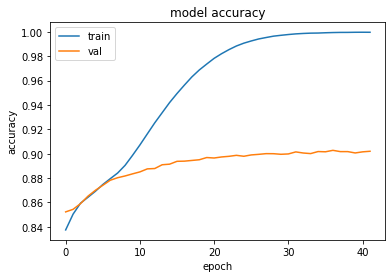

In [ ]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

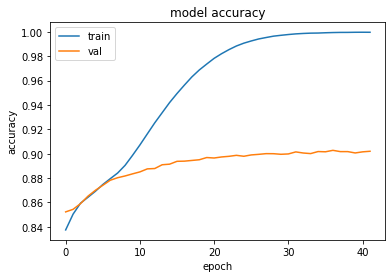

In [ ]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

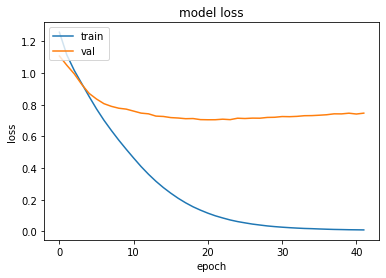

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save ("/content/drive/My Drive/Main/modelnmat.h5")

In [ ]:
from keras import models    
model = models.load_model("/content/drive/My Drive/Main/modelnmt")

In [ ]:
y_tokens

In [ ]:
reverse_target_word_index=y_tokens.index_word
len(reverse_target_word_index)

11313

In [ ]:
x_tokens.index_word

{}

In [ ]:
reverse_source_word_index=x_tokens.index_word
len(reverse_source_word_index)

5569

In [ ]:
target_word_index=y_tokens.word_index
len(target_word_index)

11313

In [ ]:

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=[encoder_inputs,img_inputs],outputs=[encoder_outputs,state_h,state_c])
encoder_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 24)]         0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 24, 512)      2851840     ['input_4[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 2560)]       0           []                               
                                                                                                  
 bidirectional_2 (Bidirectional  [(None, 24, 512),   1574912     ['embedding_1[0][0]']            
 )                               (None, 256),                                               

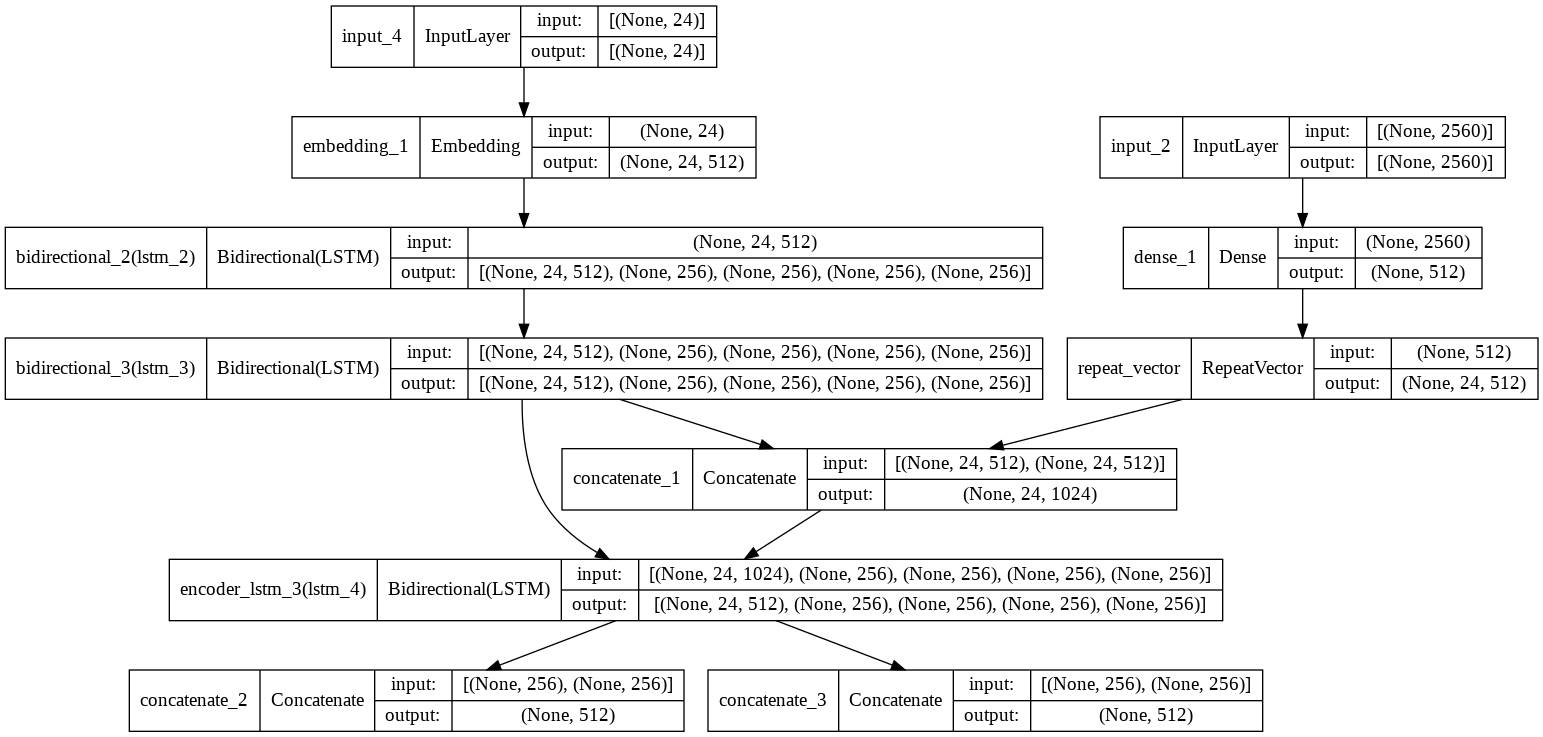

In [ ]:
tf.keras.utils.plot_model(
    encoder_model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

In [ ]:
# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(512,))
decoder_state_input_c = Input(shape=(512,))
encoder_inf_states=Input(shape=(trmaxlen_english,512,))
decoder_hidden_state_input = Input(shape=(trmaxlen_english,512))
print(decoder_inputs.get_shape)
#print(dec_emb.get_shape)

<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, None) dtype=float32 (created by layer 'input_5')>>


In [ ]:
dec_states = [decoder_state_input_h, decoder_state_input_c]

In [ ]:

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=dec_states)
attn_inf_out, attn_inf_states = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_inf_out]) 

In [ ]:

dec_states2= [state_h2, state_c2]

decoder_outputs2 = decoder_dense(decoder_inf_concat)

In [ ]:
decoder_model= Model(
                    [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
                     [decoder_outputs2]+ dec_states2)
decoder_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, None, 1024)   11585536    ['input_5[0][0]']                
                                                                                                  
 input_8 (InputLayer)           [(None, 512)]        0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 512)]        0           []                               
                                                                                            

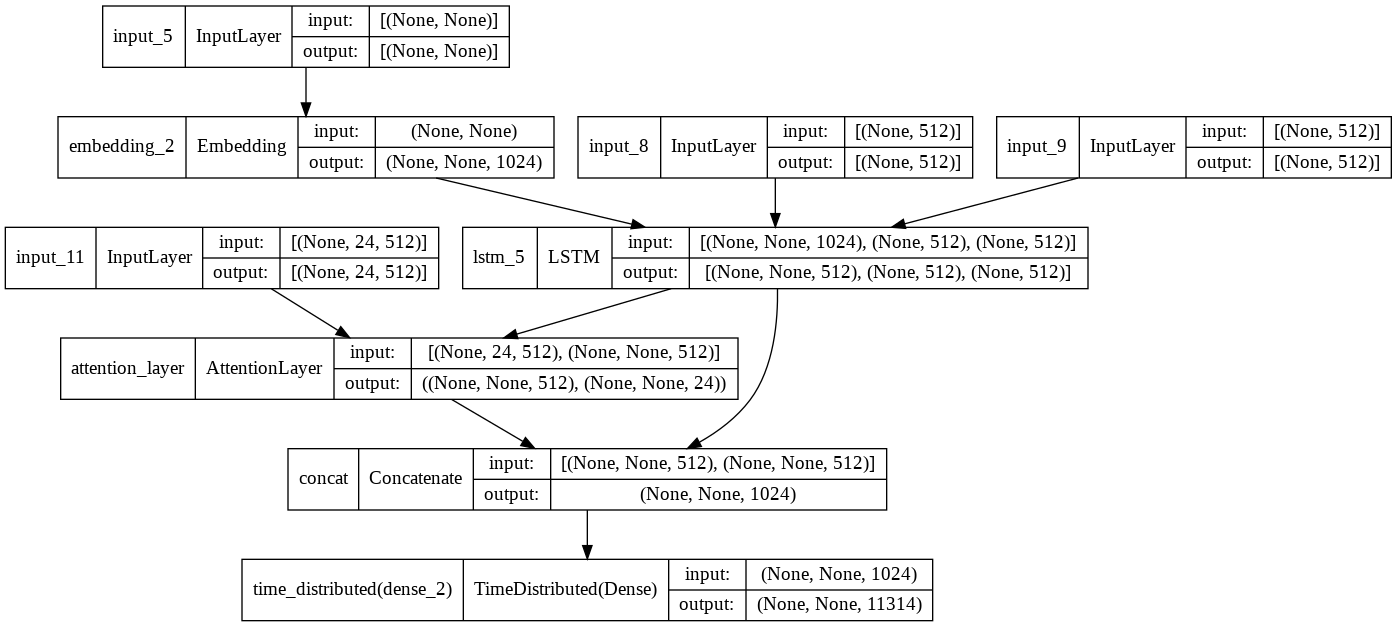

In [ ]:
tf.keras.utils.plot_model(
    decoder_model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

In [ ]:
def decode_sequence(input_seq,img):
    img=img[np.newaxis,:]
    # Encode the input as state vectors.
    enc_output, enc_h, enc_c   = encoder_model.predict([input_seq,img])
    

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sos']

    stop_condition = False
    decoded_sentence = ''
    attention_weights=[]
    while not stop_condition:
      
        output_tokens, h, c  = decoder_model.predict([target_seq] + [enc_output, enc_h, enc_c ])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        if sampled_token_index == 0:
            break
        else:
            sampled_token = reverse_target_word_index[sampled_token_index]
        #attention_weights.append((sampled_token_index, attention))
        if(sampled_token!='eos'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eos'  or len(decoded_sentence.split()) >= (trmaxlen_malayalam -1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        enc_h, enc_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sos']) and i!=target_word_index['eos']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
for i in range(5):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,trmaxlen_english),trvgg_feature[i]))
    print("\n")

Review: male surfer surfing in still in the ocean 
Original summary: ശാന്തമായ കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ 
Predicted summary:  ശാന്തമായ കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ


Review: it is an indoor scene 
Original summary: ഇത് ഒരു ഇൻഡോർ രംഗമാണ് 
Predicted summary:  ഇത് ഒരു ഇൻഡോർ രംഗമാണ്


Review: computer screens turned on 
Original summary: കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി 
Predicted summary:  കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി


Review: man has short hair 
Original summary: മനുഷ്യന് ചെറിയ മുടിയുണ്ട് 
Predicted summary:  മനുഷ്യന് ചെറിയ മുടിയുണ്ട്


Review: photo album open on an adults lap 
Original summary: ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു 
Predicted summary:  ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു




Review: photo album open on an adults lap 
Original summary: ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു 
Predicted summary:  ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു


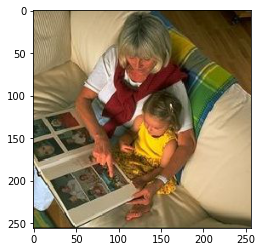

In [ ]:
i=4
print("Review:",seq2text(x_tr[i]))
print("Original summary:",seq2summary(y_tr[i]))
print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,trmaxlen_english),trvgg_feature[i]))
im=mp.imread(tr_img_path[i])
plt.imshow(im)

Review: parrot sitting on a tree branch 
Original summary: ഒരു മരക്കൊമ്പിൽ ഇരിക്കുന്ന കിളി 
Predicted summary:  ഒരു മരക്കൊമ്പിൽ ഇരിക്കുന്ന കിളി


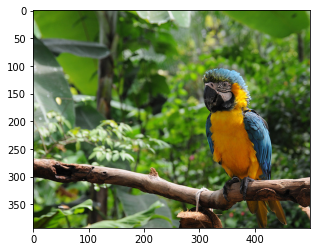

In [ ]:
i=1000
print("Review:",seq2text(x_tr[i]))
print("Original summary:",seq2summary(y_tr[i]))
print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,trmaxlen_english),trvgg_feature[i]))
im=mp.imread(tr_img_path[i])
plt.imshow(im)

Review: a red and yellow flag 
Original summary: ചുവപ്പും മഞ്ഞയും നിറത്തിൽ ഉള്ള പതാക 
Predicted summary:  ചുവപ്പും മഞ്ഞയും നിറത്തിൽ ഉള്ള പതാക


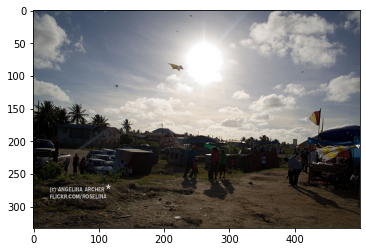

In [ ]:
i=25000
print("Review:",seq2text(x_tr[i]))
print("Original summary:",seq2summary(y_tr[i]))
print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,trmaxlen_english),trvgg_feature[i]))
im=mp.imread(tr_img_path[i])
plt.imshow(im)

Review: the hat is black 
Original summary: കറുത്ത തൊപ്പി 
Predicted summary:  തൊപ്പി കറുത്തതാണ്


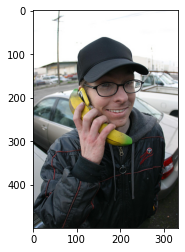

In [ ]:
i=195
print("Review:",seq2text(x_val[i]))
print("Original summary:",seq2summary(y_val[i]))
print("Predicted summary:",decode_sequence(x_val[i].reshape(1,trmaxlen_english),dvgg_feature[i]))
im=mp.imread(val_img_path[i])
plt.imshow(im)

Review: on the plates 
Original summary: പ്ലേറ്റുകളിൽ 
Predicted summary:  കത്തി


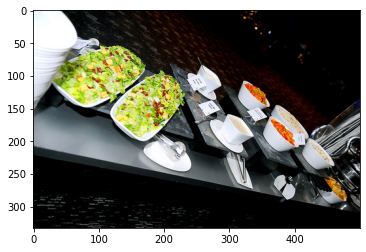

In [ ]:
i=990
print("Review:",seq2text(x_val[i]))
print("Original summary:",seq2summary(y_val[i]))
print("Predicted summary:",decode_sequence(x_val[i].reshape(1,trmaxlen_english),dvgg_feature[i]))
im=mp.imread(val_img_path[i])
plt.imshow(im)

Review: a train on train tracks 
Original summary: ട്രെയിൻ ട്രാക്കുകളിൽ ഒരു ട്രെയിൻ 
Predicted summary:  ട്രെയിൻ ട്രാക്കുകളിൽ ഒരു ട്രെയിൻ


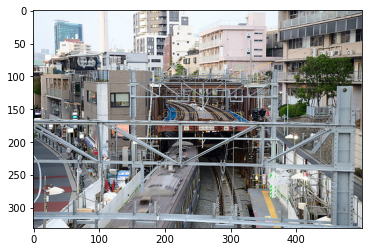

In [ ]:
i=200
print("Review:",seq2text(x_val[i]))
print("Original summary:",seq2summary(y_val[i]))
print("Predicted summary:",decode_sequence(x_val[i].reshape(1,trmaxlen_english),dvgg_feature[i]))
im=mp.imread(val_img_path[i])
plt.imshow(im)

Review: paper on the couch 
Original summary: കട്ടിലിൽ കടലാസ് 
Predicted summary:  കട്ടിലിൽ പെയിന്റിംഗ്


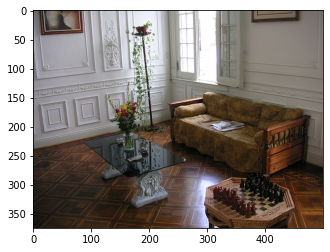

In [ ]:
i=350
print("Review:",seq2text(x_val[i]))
print("Original summary:",seq2summary(y_val[i]))
print("Predicted summary:",decode_sequence(x_val[i].reshape(1,trmaxlen_english),dvgg_feature[i]))
im=mp.imread(val_img_path[i])
plt.imshow(im)

Review: these cars are parked on the dirt 
Original summary: ഈ കാറുകൾ അഴുക്കിൽ പാർക്ക് ചെയ്തിരിക്കുന്നു 
Predicted summary:  ചാരനിറത്തിലുള്ള റോഡിന്റെ വശങ്ങളിൽ പച്ച പുല്ലിന്റെ സ്ട്രിപ്പുകൾ


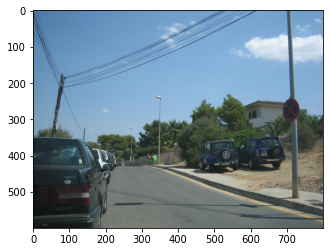

In [ ]:
i=5
print("Review:",seq2text(x_val[i]))
print("Original summary:",seq2summary(y_val[i]))
print("Predicted summary:",decode_sequence(x_val[i].reshape(1,trmaxlen_english),dvgg_feature[i]))
im=mp.imread(val_img_path[i])
plt.imshow(im)

Review: four legged steel chair on ground 
Original summary: നിലത്ത് നാല് കാലുകളുള്ള ഉരുക്ക് കസേര 
Predicted summary:  നാല് ആടുകൾ മേശപ്പുറത്ത് ഇരിക്കുന്നു


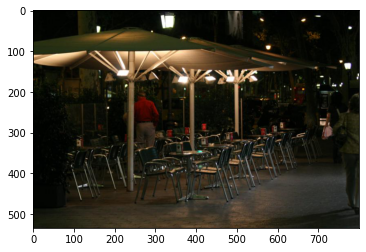

In [ ]:
i=3
print("Review:",seq2text(x_val[i]))
print("Original summary:",seq2summary(y_val[i]))
print("Predicted summary:",decode_sequence(x_val[i].reshape(1,trmaxlen_english),dvgg_feature[i]))
im=mp.imread(val_img_path[i])
plt.imshow(im)

Review: man wearing a gray sweater 
Original summary: ചാരനിറത്തിലുള്ള സ്വെറ്റർ ധരിച്ച മനുഷ്യൻ 
Predicted summary:  മനുഷ്യൻ സ്വെറ്റർ ധരിച്ച മനുഷ്യൻ


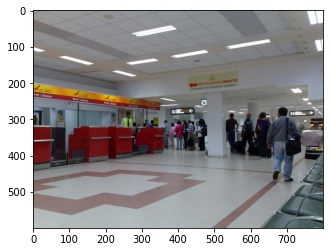

In [ ]:
i=9
print("Review:",seq2text(x_val[i]))
print("Original summary:",seq2summary(y_val[i]))
print("Predicted summary:",decode_sequence(x_val[i].reshape(1,trmaxlen_english),dvgg_feature[i]))
im=mp.imread(val_img_path[i])
plt.imshow(im)

Review: car parked next to sidewalk 
Original summary: കാർ നടപ്പാതയുടെ അരികിൽ നിർത്തി ഇട്ടിരിക്കുന്നു 
Predicted summary:  തടി റോഡിൽ പാർക്ക് ചെയ്തിരിക്കുന്ന കാർ


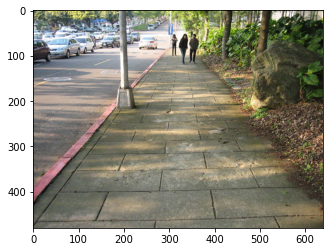

In [ ]:
i=35
print("Review:",seq2text(x_val[i]))
print("Original summary:",seq2summary(y_val[i]))
print("Predicted summary:",decode_sequence(x_val[i].reshape(1,trmaxlen_english),dvgg_feature[i]))
im=mp.imread(val_img_path[i])
plt.imshow(im)

Review: tree off in the distance behind the elephant 
Original summary: ആനയുടെ പുറകിലുള്ള മരം 
Predicted summary:  കറന്റുള്ള പുൽമേടിലെ വലിയ ആന


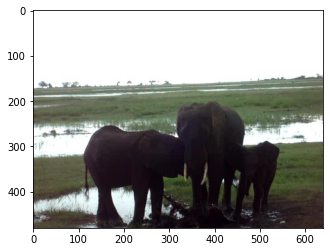

In [ ]:
i=46
print("Review:",seq2text(x_val[i]))
print("Original summary:",seq2summary(y_val[i]))
print("Predicted summary:",decode_sequence(x_val[i].reshape(1,trmaxlen_english),dvgg_feature[i]))
im=mp.imread(val_img_path[i])
plt.imshow(im)

Review: the white on the head of the man 
Original summary: മനുഷ്യന്റെ തലയിലെ വെളുത്ത 
Predicted summary:  മനുഷ്യന്റെ തലയിൽ വെളുത്ത തൊപ്പി


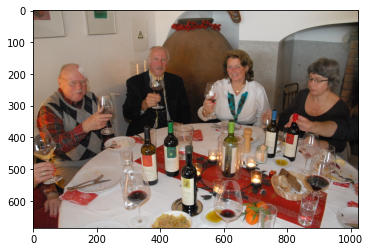

In [ ]:
i=47
print("Review:",seq2text(x_val[i]))
print("Original summary:",seq2summary(y_val[i]))
print("Predicted summary:",decode_sequence(x_val[i].reshape(1,trmaxlen_english),dvgg_feature[i]))
im=mp.imread(val_img_path[i])
plt.imshow(im)

Review: black cow standing in field 
Original summary: വയലിൽ നിൽക്കുന്ന കറുത്ത പശു 
Predicted summary:  വയലിൽ പശു നിൽക്കുന്നു


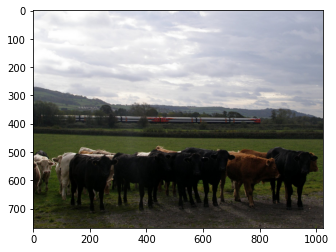

In [ ]:
i=51
print("Review:",seq2text(x_val[i]))
print("Original summary:",seq2summary(y_val[i]))
print("Predicted summary:",decode_sequence(x_val[i].reshape(1,trmaxlen_english),dvgg_feature[i]))
im=mp.imread(val_img_path[i])
plt.imshow(im)

Review: a plaid umbrella 
Original summary: ഒരു പ്ലെയ്ഡ് കുട 
Predicted summary:  ഒരു ബാഗ് കോട്ടൺ മിഠായി


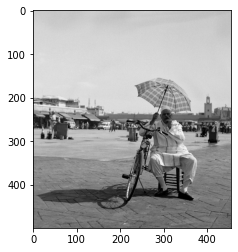

In [ ]:
i=101
print("Review:",seq2text(x_val[i]))
print("Original summary:",seq2summary(y_val[i]))
print("Predicted summary:",decode_sequence(x_val[i].reshape(1,trmaxlen_english),dvgg_feature[i]))
im=mp.imread(val_img_path[i])
plt.imshow(im)

Review: this is a motorcycle 
Original summary: ഇതൊരു മോട്ടോർസൈക്കിളാണ് 
Predicted summary:  ഇതൊരു മോട്ടോർ ബൈക്കാണ്


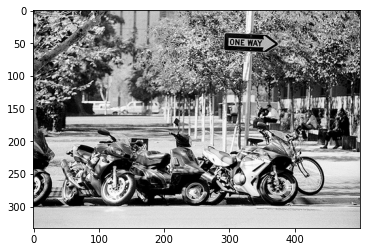

In [ ]:
i=121
print("Review:",seq2text(x_val[i]))
print("Original summary:",seq2summary(y_val[i]))
print("Predicted summary:",decode_sequence(x_val[i].reshape(1,trmaxlen_english),dvgg_feature[i]))
im=mp.imread(val_img_path[i])
plt.imshow(im)

Review: a skateboard tilted up 
Original summary: ഒരു സ്കേറ്റ്ബോർഡ് മുകളിലേക്ക് വച്ചിരിക്കുന്നു 
Predicted summary:  കെട്ടിടത്തിന് മുകളിൽ ഒരു ഫ്ലാഗ് പോൾ


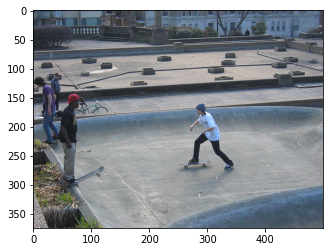

In [ ]:
i=151
print("Review:",seq2text(x_val[i]))
print("Original summary:",seq2summary(y_val[i]))
print("Predicted summary:",decode_sequence(x_val[i].reshape(1,trmaxlen_english),dvgg_feature[i]))
im=mp.imread(val_img_path[i])
plt.imshow(im)

Review: a womans dark brown sunglasses 
Original summary: ഒരു സ്ത്രീയുടെ ഇരുണ്ട ബ്രൗൺ സൺഗ്ലാസുകൾ 
Predicted summary:  ഇരുണ്ട തവിട്ട് നിറമുള്ള മുടിയുള്ള ഒരു സ്ത്രീയുടെ മുഖം


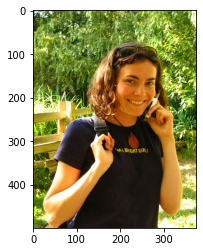

In [ ]:
i=157
print("Review:",seq2text(x_val[i]))
print("Original summary:",seq2summary(y_val[i]))
print("Predicted summary:",decode_sequence(x_val[i].reshape(1,trmaxlen_english),dvgg_feature[i]))
im=mp.imread(val_img_path[i])
plt.imshow(im)

Review: a light on a pole 
Original summary: ഒരു പോളിൽ ഒരു പ്രകാശം 
Predicted summary:  ഒരു ലോഹധ്രുവത്തിൽ ഒരു വെളിച്ചം


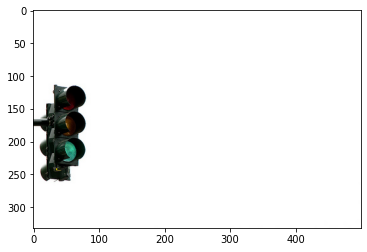

In [ ]:
i=159
print("Review:",seq2text(x_val[i]))
print("Original summary:",seq2summary(y_val[i]))
print("Predicted summary:",decode_sequence(x_val[i].reshape(1,trmaxlen_english),dvgg_feature[i]))
im=mp.imread(val_img_path[i])
plt.imshow(im)

Review: a fresh time 
Original summary: ഒരു സോക്ക് ഉറങ്ങുന്നു 
Predicted summary:  ഒരു വയർ സാലഡ്


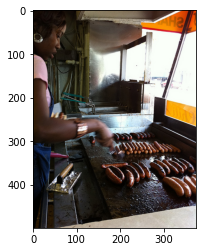

In [ ]:
i=159
print("Review:",seq2text(x_tt[i]))
print("Original summary:",seq2summary(y_tt[i]))
print("Predicted summary:",decode_sequence(x_tt[i].reshape(1,trmaxlen_english),testvgg_feature[i]))
im=mp.imread(test_img_path[i])
plt.imshow(im)

Review: dr on the mirror interior of the cooked 
Original summary: ഡെസ്ക് സ്കീയിംഗ് വിമാനത്തിലെ ചാരിയിരിക്കുന്നു 
Predicted summary:  toy4fun ഉള്ള ഹോട്ടൽ വാൻ


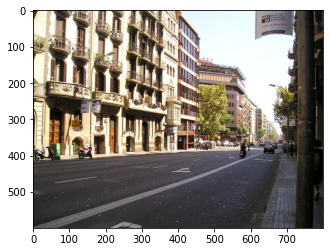

In [ ]:
i=5
print("Review:",seq2text(x_tt[i]))
print("Original summary:",seq2summary(y_tt[i]))
print("Predicted summary:",decode_sequence(x_tt[i].reshape(1,trmaxlen_english),testvgg_feature[i]))
im=mp.imread(test_img_path[i])
plt.imshow(im)

Review: her are boy sheep 
Original summary: കവല നിലത്ത് ബണ്ണിലെ 
Predicted summary:  അവൻ ബേസ്ബോൾ കളിക്കുന്നു


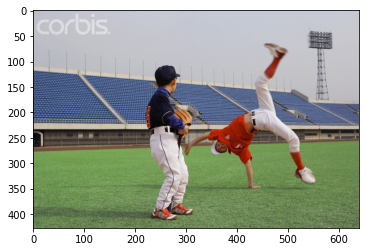

In [ ]:
i=10
print("Review:",seq2text(x_tt[i]))
print("Original summary:",seq2summary(y_tt[i]))
print("Predicted summary:",decode_sequence(x_tt[i].reshape(1,trmaxlen_english),testvgg_feature[i]))
im=mp.imread(test_img_path[i])
plt.imshow(im)

Review: fire it part the clock hanging 
Original summary: പുള്ളി തലമുടി മുൻവശത്തെ വലത് 
Predicted summary:  ഇഷ്ടിക ക്ലോക്ക് ടവർ


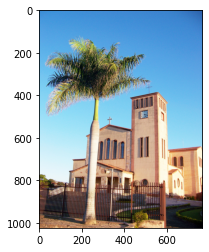

In [ ]:
i=100
print("Review:",seq2text(x_tt[i]))
print("Original summary:",seq2summary(y_tt[i]))
print("Predicted summary:",decode_sequence(x_tt[i].reshape(1,trmaxlen_english),testvgg_feature[i]))
im=mp.imread(test_img_path[i])
plt.imshow(im)

Review: blue asphalt animals on mirror hand 
Original summary: പുരുഷന്റെ അലക്കു നീല അറ്റം 
Predicted summary:  സ്ത്രീയുടെ വിരലിൽ നീളമുള്ള നീല മാല


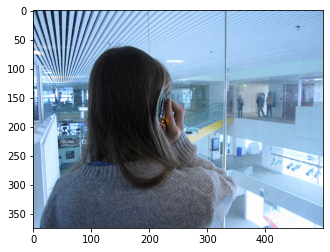

In [ ]:
i=400
print("Review:",seq2text(x_tt[i]))
print("Original summary:",seq2summary(y_tt[i]))
print("Predicted summary:",decode_sequence(x_tt[i].reshape(1,trmaxlen_english),testvgg_feature[i]))
im=mp.imread(test_img_path[i])
plt.imshow(im)

Review: white tv can in shelf 
Original summary: സമുദ്രത്തിലേക്ക് വെളുത്ത മേഘങ്ങളുള്ള അക്ഷരങ്ങൾ 
Predicted summary:  ഡെസ്‌ക്കിന് മുകളിൽ വെളുത്ത ലാപ് ടോപ്പ്


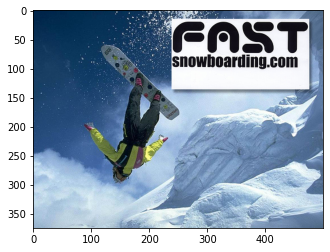

In [ ]:
i=700
print("Review:",seq2text(x_tt[i]))
print("Original summary:",seq2summary(y_tt[i]))
print("Predicted summary:",decode_sequence(x_tt[i].reshape(1,trmaxlen_english),testvgg_feature[i]))
im=mp.imread(test_img_path[i])
plt.imshow(im)

Review: a mirror pizza in a painting 
Original summary: കുഞ്ഞിന്റെ സ്കീയിംഗ് പിസ്സ 
Predicted summary:  ഒരു സ്ലൈസ് പിസ്സ കഴിക്കുന്ന ഒരു പിസ്സ


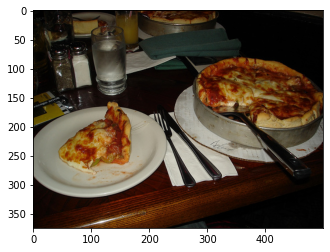

In [ ]:
i=2
print("Review:",seq2text(x_tt[i]))
print("Original summary:",seq2summary(y_tt[i]))
print("Predicted summary:",decode_sequence(x_tt[i].reshape(1,trmaxlen_english),testvgg_feature[i]))
im=mp.imread(test_img_path[i])
plt.imshow(im)

Review: the cat is next window the mirror cat 
Original summary: മേശപ്പുറത്ത് സ്കീയിംഗ് പരിശോധിക്കുന്നു വളരെ 
Predicted summary:  പൂച്ചയുടെ വലത് ചെവി ഉണ്ട്


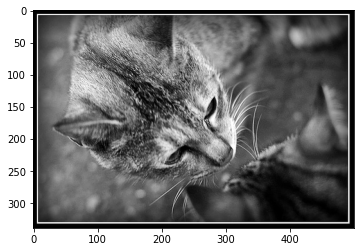

In [ ]:
i=201
print("Review:",seq2text(x_tt[i]))
print("Original summary:",seq2summary(y_tt[i]))
print("Predicted summary:",decode_sequence(x_tt[i].reshape(1,trmaxlen_english),testvgg_feature[i]))
im=mp.imread(test_img_path[i])
plt.imshow(im)

Review: black metal fire lit light 
Original summary: കറുത്ത ടെഡി ടി റിമോട്ട് ലൈറ്റ് 
Predicted summary:  കറുത്ത മെറ്റൽ റൗണ്ട് ശൈലിയിലുള്ള ചിഹ്നം


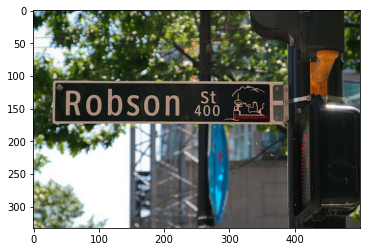

In [ ]:
i=407
print("Review:",seq2text(x_tt[i]))
print("Original summary:",seq2summary(y_tt[i]))
print("Predicted summary:",decode_sequence(x_tt[i].reshape(1,trmaxlen_english),testvgg_feature[i]))
im=mp.imread(test_img_path[i])
plt.imshow(im)

Review: train television face tv 
Original summary: സ്കൂൾ വിമാനത്തിൽ ചിഹ്നം 
Predicted summary:  ട്രെയിനിന്റെ മുൻ വിൻഡോ


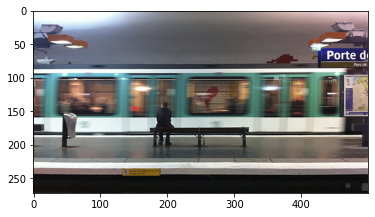

In [ ]:
i=427
print("Review:",seq2text(x_tt[i]))
print("Original summary:",seq2summary(y_tt[i]))
print("Predicted summary:",decode_sequence(x_tt[i].reshape(1,trmaxlen_english),testvgg_feature[i]))
im=mp.imread(test_img_path[i])
plt.imshow(im)

Review: the white haired sliced in the near 
Original summary: വെള്ളിയും വെളുത്ത കൂടാരം പാഡിൽ 
Predicted summary:  പാറകളുടെ മുകളിൽ വെളുത്ത കുതിര


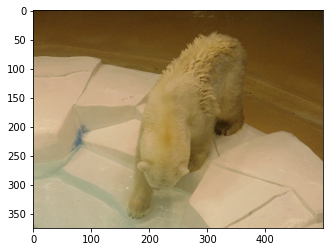

In [ ]:
i=428
print("Review:",seq2text(x_tt[i]))
print("Original summary:",seq2summary(y_tt[i]))
print("Predicted summary:",decode_sequence(x_tt[i].reshape(1,trmaxlen_english),testvgg_feature[i]))
im=mp.imread(test_img_path[i])
plt.imshow(im)

Review: mirror glass on clock 
Original summary: ട്രിക്ക് കീബോർഡിലെ പ്രതിഫലിക്കുന്നു 
Predicted summary:  ഘടികാരത്തിലെ കണ്ണാടി ഷാർഡുകൾ


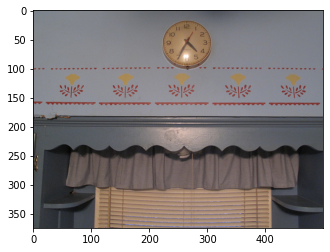

In [ ]:
i=430
print("Review:",seq2text(x_tt[i]))
print("Original summary:",seq2summary(y_tt[i]))
print("Predicted summary:",decode_sequence(x_tt[i].reshape(1,trmaxlen_english),testvgg_feature[i]))
im=mp.imread(test_img_path[i])
plt.imshow(im)

Review: a cats player 
Original summary: ഒരു ചെക്കേർഡ് കൈ 
Predicted summary:  ഒരു സ്ത്രീയുടെ കൈ


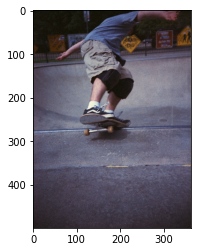

In [ ]:
i=435
print("Review:",seq2text(x_tt[i]))
print("Original summary:",seq2summary(y_tt[i]))
print("Predicted summary:",decode_sequence(x_tt[i].reshape(1,trmaxlen_english),testvgg_feature[i]))
im=mp.imread(test_img_path[i])
plt.imshow(im)

Review: long toothbrush wire the zebra 
Original summary: നിയോൺ ബാത്ത് പാത്രത്തിൽ അഴുക്കുചാലിൽ 
Predicted summary:  പുൽ മൈതാനത്ത് നീളമുള്ള കൂമ്പാരം


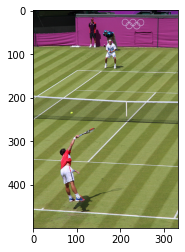

In [ ]:
i=478
print("Review:",seq2text(x_tt[i]))
print("Original summary:",seq2summary(y_tt[i]))
print("Predicted summary:",decode_sequence(x_tt[i].reshape(1,trmaxlen_english),testvgg_feature[i]))
im=mp.imread(test_img_path[i])
plt.imshow(im)

Review: a wood on the ground 
Original summary: ആളുകൾ ഒരു ആപ്പിൾ 
Predicted summary:  ഒരു ടാക്കേരിയ ലെറ്റി ട്രക്ക്


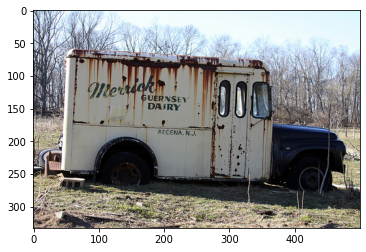

In [ ]:
i=479
print("Review:",seq2text(x_tt[i]))
print("Original summary:",seq2summary(y_tt[i]))
print("Predicted summary:",decode_sequence(x_tt[i].reshape(1,trmaxlen_english),testvgg_feature[i]))
im=mp.imread(test_img_path[i])
plt.imshow(im)

Review: green baseball it part sheep 
Original summary: നിറങ്ങളുള്ള ടൈൽ പച്ച വിമാനമാണ് 
Predicted summary:  പച്ച ബേസ്ബോൾ ബാറ്റ്


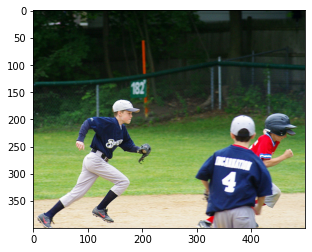

In [ ]:
i=550
print("Review:",seq2text(x_tt[i]))
print("Original summary:",seq2summary(y_tt[i]))
print("Predicted summary:",decode_sequence(x_tt[i].reshape(1,trmaxlen_english),testvgg_feature[i]))
im=mp.imread(test_img_path[i])
plt.imshow(im)

Review: mountain sheep red shirt 
Original summary: ആനയുടെ മുറിയിൽ ചാരനിറത്തിലുള്ള ഷർട്ട് 
Predicted summary:  വലിയ ചുവന്ന ചിഹ്നം നിലത്ത്


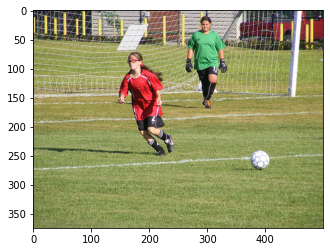

In [ ]:
i=575
print("Review:",seq2text(x_tt[i]))
print("Original summary:",seq2summary(y_tt[i]))
print("Predicted summary:",decode_sequence(x_tt[i].reshape(1,trmaxlen_english),testvgg_feature[i]))
im=mp.imread(test_img_path[i])
plt.imshow(im)

Review: yellow ear and leg womans 
Original summary: കുഞ്ഞ് അഴുക്ക് വച്ചിരിക്കുന്നു ഇവർ 
Predicted summary:  മഞ്ഞ ചക്രങ്ങളുള്ള മഞ്ഞ ഹോട്ട് ഡോഗ്


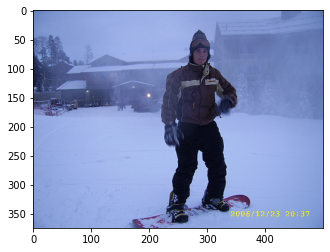

In [ ]:
i=891
print("Review:",seq2text(x_tt[i]))
print("Original summary:",seq2summary(y_tt[i]))
print("Predicted summary:",decode_sequence(x_tt[i].reshape(1,trmaxlen_english),testvgg_feature[i]))
im=mp.imread(test_img_path[i])
plt.imshow(im)

Review: ear and boxes ocean the old ledge pair 
Original summary: ഫോട്ടോ എടുത്ത തീയതിയും ഹോട്ടലും
Predicted summary:  ഗ്ലാസ് ടോപ്പ് ഉള്ള ധൂമ്രനൂൽ സ്റ്റിക്കർ


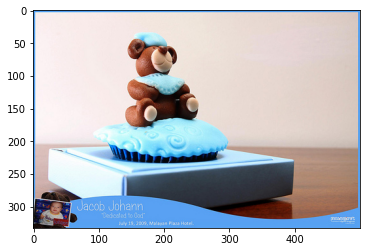

In [ ]:
i=922
print("Review:",seq2text(x_tt[i]))
print("Original summary:",test_mal_txt[i])
print("Predicted summary:",decode_sequence(x_tt[i].reshape(1,trmaxlen_english),testvgg_feature[i]))
im=mp.imread(test_img_path[922])
plt.imshow(im)

In [ ]:
!pip install sacrebleu
import sacrebleu
import random

     |████████████████████████████████| 90 kB 4.2 MB/s 


In [ ]:
temp_o=[]
temp_p=[]
for i in range(1000):
    s=random.randint(0,len(y_tr)-1)
    temp_o.append(seq2summary(y_tr[s]))
    temp_p.append(decode_sequence(x_tr[s].reshape(1,trmaxlen_english),trvgg_feature[s]))

bleu = sacrebleu.corpus_bleu(temp_o, [temp_p],lowercase=True, tokenize='intl')
print(bleu.score)

99.72396570032375


In [ ]:
temp_o=[]
temp_p=[]
for i in range(998):
    s=random.randint(0,len(y_val)-1)
    temp_o.append(seq2summary(y_val[s]))
    temp_p.append(decode_sequence(x_val[s].reshape(1,trmaxlen_english),dvgg_feature[s]))

#bleu = sacrebleu.corpus_bleu(temp_o, [temp_p],lowercase=True, tokenize='intl')


bleu = sacrebleu.corpus_bleu(temp_o, [temp_p],lowercase=True, tokenize='intl')
print(bleu.score)

14.531973450612888


In [ ]:
temp_o=[]
temp_p=[]
for i in range(1400):
    s=random.randint(0,len(y_tt)-1)
    temp_o.append(seq2summary(y_tt[s]))
    temp_p.append(decode_sequence(x_tt[s].reshape(1,trmaxlen_english)))
bleu = sacrebleu.corpus_bleu(temp_o, [temp_p],lowercase=True, tokenize='intl')
print(bleu.score)

0.09184339617948235
